# **쇼핑몰 주문 데이터 분석 - 매출 분석**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('data/OnlineRetail2.csv')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceHour,InvoiceWeekday,InvoiceDay,InvoiceMonth,InvoiceYear,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,8,Wednesday,1,12,2010,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,8,Wednesday,1,12,2010,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,8,Wednesday,1,12,2010,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,8,Wednesday,1,12,2010,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,8,Wednesday,1,12,2010,20.34


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397884 entries, 0 to 397883
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   InvoiceNo       397884 non-null  int64  
 1   StockCode       397884 non-null  object 
 2   Description     397884 non-null  object 
 3   Quantity        397884 non-null  int64  
 4   InvoiceDate     397884 non-null  object 
 5   UnitPrice       397884 non-null  float64
 6   CustomerID      397884 non-null  int64  
 7   Country         397884 non-null  object 
 8   InvoiceHour     397884 non-null  int64  
 9   InvoiceWeekday  397884 non-null  object 
 10  InvoiceDay      397884 non-null  int64  
 11  InvoiceMonth    397884 non-null  int64  
 12  InvoiceYear     397884 non-null  int64  
 13  Amount          397884 non-null  float64
dtypes: float64(2), int64(7), object(5)
memory usage: 42.5+ MB


In [4]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

## **전체 매출 분석**

In [5]:
## 전체 매출
total_monetary = data['Amount'].sum()
total_monetary

8911407.904

## **월별 매출 분석**

In [6]:
data['InvoiceYM'] = data['InvoiceDate'].dt.strftime('%Y%m')

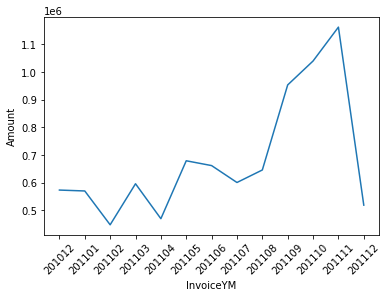

In [7]:
## 매출 추이
group = data.groupby(['InvoiceYM'], as_index=False)['Amount'].sum()
ax = sns.lineplot(x = 'InvoiceYM', y = 'Amount', data = group)
ax.tick_params(axis='x', labelrotation=45)
plt.show()

- 2011년 9, 10, 11월에 매출이 급격히 늘어난 후 12월에 급격히 줄었다.

In [8]:
data[["InvoiceYear", "InvoiceMonth", "InvoiceDay"]].drop_duplicates().sort_values(by=["InvoiceYear", "InvoiceMonth", "InvoiceDay"])

,InvoiceYear,InvoiceMonth,InvoiceDay
0,2010,12,1
1942,2010,12,2
3942,2010,12,3
5045,2010,12,5
7752,2010,12,6
...,...,...,...
386640,2011,12,5
390014,2011,12,6
392568,2011,12,7
394735,2011,12,8


- 2011년 12월 데이터가 9일까지밖에 존재하지 않기 때문에 급격히 줄어든것처럼 보인 것이였다.

## **일별 매출 추이 분석**

In [9]:
data['InvoiceYMD'] = data['InvoiceDate'].dt.strftime('%Y%m%d')

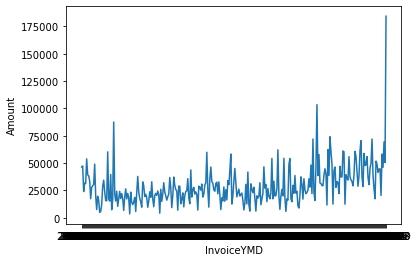

In [10]:
## 매출 추이
group = data.groupby(['InvoiceYMD'], as_index=False)['Amount'].sum().sort_values(by=['InvoiceYMD'])
ax = sns.lineplot(x = 'InvoiceYMD', y = 'Amount', data = group)
plt.show()

In [11]:
group

,InvoiceYMD,Amount
0,20101201,46376.49
1,20101202,47316.53
2,20101203,23921.71
3,20101205,31771.60
4,20101206,31215.64
...,...,...
300,20111205,58202.21
301,20111206,46144.04
302,20111207,69354.21
303,20111208,50519.41


- 실제로 일별 매출 추이 확인 결과 매출은 점점 증가하는 추세를 보인다.

## **시간대별 매출 분석**

In [12]:
hour_monetary = data.groupby(['InvoiceHour']).agg({'Amount':'sum'}).sort_values('Amount', ascending=False).reset_index()
hour_monetary

,InvoiceHour,Amount
0,12,1378571.480
1,10,1261192.571
2,13,1173264.750
3,11,1104558.750
4,14,995629.371
5,15,966191.750
6,9,842605.171
7,16,468885.800
8,8,282115.630
9,17,234413.521


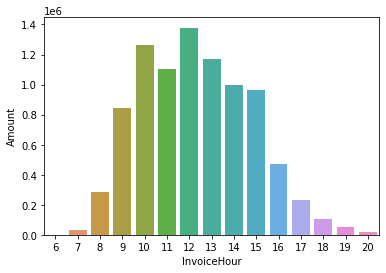

In [13]:
ax = sns.barplot(x = 'InvoiceHour', y = 'Amount', data = hour_monetary)
plt.show()

- 10~13시 사이에 많은 주문이 일어나며 특히 12시에 가장 많은 주문이 발생한다.
- 21 ~ 6시 사이에는 주문이 발생하지 않는다.
- 15시 이후 주문량이 급락한다.

## **요일별 매출 분석**

In [14]:
day_monetary = data.groupby(['InvoiceWeekday']).agg({'Amount':'sum'}).sort_values('Amount', ascending=False).reset_index()
day_monetary

,InvoiceWeekday,Amount
0,Thursday,1976859.070
1,Tuesday,1700634.631
2,Wednesday,1588336.170
3,Friday,1485917.401
4,Monday,1367146.411
5,Sunday,792514.221


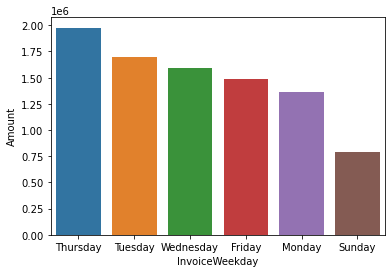

In [15]:
ax = sns.barplot(x = 'InvoiceWeekday', y = 'Amount', data = day_monetary)
plt.show()

- 특이하게도 토요일에는 매출이 존재하지 않는다.
- 화, 수, 목에 대부분의 매출이 발생하며, 목 > 화 > 수 > 금 > 월 > 일 순으로 매출이 많이 발생한다.

## **인기 상품 분석**

In [16]:
len(data.StockCode.unique())

3665

In [17]:
stock_lst = data.drop_duplicates(['StockCode'])[['StockCode', 'Description', 'UnitPrice']]
stock_lst

,StockCode,Description,UnitPrice
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2.55
1,71053,WHITE METAL LANTERN,3.39
2,84406B,CREAM CUPID HEARTS COAT HANGER,2.75
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,3.39
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,3.39
...,...,...,...
388954,90214U,"LETTER ""U"" BLING KEY RING",0.29
388956,90214W,"LETTER ""W"" BLING KEY RING",0.29
388958,90214Z,"LETTER ""Z"" BLING KEY RING",0.29
390744,90089,PINK CRYSTAL SKULL PHONE CHARM,0.19


In [18]:
## 매출 상위 10개 상품 확인
pop_amt_stock = data.groupby(['StockCode']).agg({'Amount':'sum'}).sort_values('Amount', ascending=False).reset_index()
pd.merge(pop_amt_stock, stock_lst, on='StockCode').head(10)

,StockCode,Amount,Description,UnitPrice
0,23843,168469.60,"PAPER CRAFT , LITTLE BIRDIE",2.08
1,22423,142592.95,REGENCY CAKESTAND 3 TIER,10.95
2,85123A,100603.50,WHITE HANGING HEART T-LIGHT HOLDER,2.55
3,85099B,85220.78,JUMBO BAG RED RETROSPOT,1.65
4,23166,81416.73,MEDIUM CERAMIC TOP STORAGE JAR,1.04
5,POST,77803.96,POSTAGE,18.00
6,47566,68844.33,PARTY BUNTING,4.65
7,84879,56580.34,ASSORTED COLOUR BIRD ORNAMENT,1.69
8,M,53779.93,Manual,1.25
9,23084,51346.20,RABBIT NIGHT LIGHT,2.08


In [19]:
## 주문량 상위 10개 상품 확인
pop_qnty_stock = data.groupby(['StockCode']).agg({'Quantity':'sum'}).sort_values('Quantity', ascending=False).reset_index()
pd.merge(pop_qnty_stock, stock_lst, on='StockCode').head(10)

,StockCode,Quantity,Description,UnitPrice
0,23843,80995,"PAPER CRAFT , LITTLE BIRDIE",2.08
1,23166,77916,MEDIUM CERAMIC TOP STORAGE JAR,1.04
2,84077,54415,WORLD WAR 2 GLIDERS ASSTD DESIGNS,0.29
3,22197,49183,SMALL POPCORN HOLDER,0.72
4,85099B,46181,JUMBO BAG RED RETROSPOT,1.65
5,85123A,36782,WHITE HANGING HEART T-LIGHT HOLDER,2.55
6,84879,35362,ASSORTED COLOUR BIRD ORNAMENT,1.69
7,21212,33693,PACK OF 72 RETROSPOT CAKE CASES,0.42
8,23084,27202,RABBIT NIGHT LIGHT,2.08
9,22492,26076,MINI PAINT SET VINTAGE,0.65
